In [126]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Load the dataset into python environment

In [127]:
# Read the dataset
Dat = pd.read_csv('titanic_dataset.csv')
Dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [128]:
# Read the dataset and reset the index as PassengerId
DatIndex = pd.read_csv('titanic_dataset.csv', index_col="PassengerId")
DatIndex.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [129]:
# Display the data types
DatIndex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [130]:
# Summary of statistics
DatIndex.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [131]:
# Checking the missing values using isnull() function 
DatIndex.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [134]:
# Handling missing values in Age using median
DatIndex['Age']=DatIndex['Age'].fillna(DatIndex['Age'].median())

# Handling missing values in Cabin setting it as unknown
DatIndex['Cabin']= DatIndex['Cabin'].fillna('Unknown')

# Handling missing values in Embarked using mode
DatIndex['Embarked']= DatIndex['Embarked'].fillna(DatIndex['Embarked'].mode()[0])

In [135]:
DatIndex

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S


In [136]:
# Final check to make sure that Null values are handled properly
DatIndex.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Handling Outliers for Age

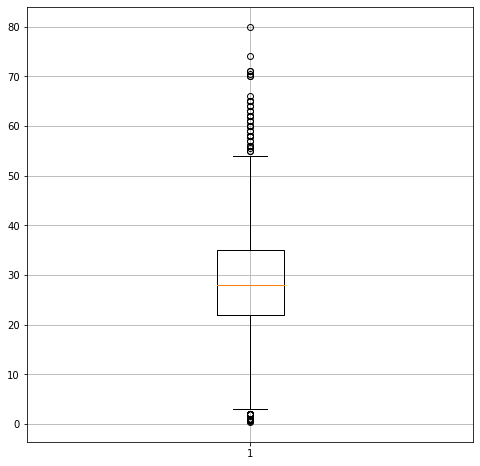

In [137]:
plt.figure(figsize=(8,8))
plt.boxplot(DatIndex["Age"])
plt.grid();

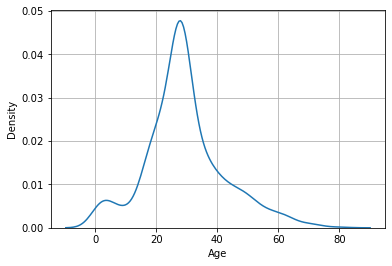

In [138]:
sns.kdeplot(DatIndex["Age"])
plt.grid()

In [139]:
DatIndex["Age"].skew()

0.5102446555756495

In [144]:
Q1 = np.percentile(DatIndex["Age"],25)
Q2 = np.percentile(DatIndex["Age"],50)
Q3 = np.percentile(DatIndex["Age"],75)
IQR = Q3 - Q1
lower_limit = Q1 - .0002 * IQR
upper_limit = Q3 + .0002 * IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in DatIndex["Age"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = DatIndex[(DatIndex["Age"] < lower_limit) | (DatIndex["Age"] > upper_limit)].index
DatIndex.drop(index_dropped,inplace=True)
DatIndex

The first Quartile = 28.0,
The Second Quartile = 28.0, 
The Third Quartile = 28.0, 
IQR = 0.0, 

lower limit = 28.0,
upper limit = 28.0

The outliers are = [27.0, 27.0, 29.0, 28.5, 29.0, 29.0, 29.0, 29.0, 29.0, 27.0, 27.0, 27.0, 29.0, 29.0, 29.0, 29.0, 27.0, 29.0, 29.0, 27.0, 29.0, 29.0, 29.0, 29.0, 27.0, 29.0, 27.0, 27.0, 27.0, 29.0, 27.0, 27.0, 29.0, 28.5, 29.0, 27.0, 27.0, 27.0, 27.0, 27.0]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,Unknown,S
20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,Unknown,C
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,Unknown,C
...,...,...,...,...,...,...,...,...,...,...,...
869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,Unknown,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,Unknown,C
879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,Unknown,S


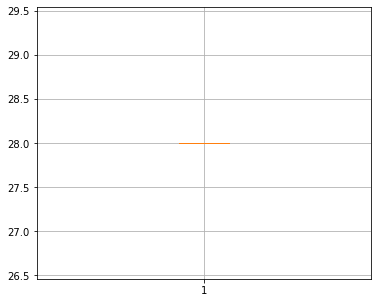

In [145]:
plt.figure(figsize=(6,5))
plt.boxplot(DatIndex["Age"])
plt.grid();

Handling Outliers for Fare

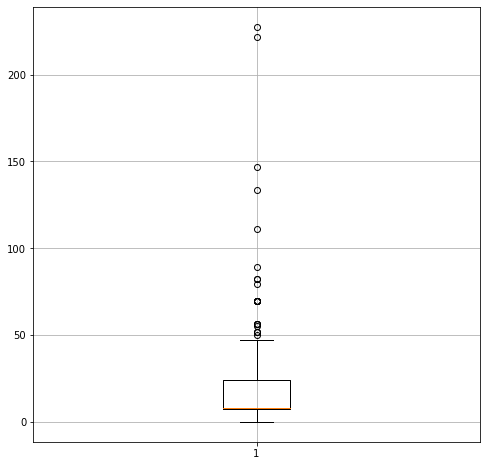

In [146]:
plt.figure(figsize=(8,8))
plt.boxplot(DatIndex["Fare"])
plt.grid();

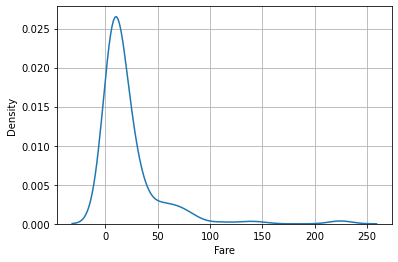

In [147]:
sns.kdeplot(DatIndex["Fare"])
plt.grid()

In [148]:
DatIndex["Fare"].skew()

3.958190961683742

In [149]:
Q1 = np.percentile(DatIndex["Fare"],25)
Q2 = np.percentile(DatIndex["Fare"],50)
Q3 = np.percentile(DatIndex["Fare"],75)
IQR = Q3 - Q1
lower_limit = Q1 - .02 * IQR
upper_limit = Q3 + .02 * IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in DatIndex["Fare"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = DatIndex[(DatIndex["Fare"] < lower_limit) | (DatIndex["Fare"] > upper_limit)].index
DatIndex.drop(index_dropped,inplace=True)
DatIndex

The first Quartile = 7.75,
The Second Quartile = 8.125, 
The Third Quartile = 24.15, 
IQR = 16.4, 

lower limit = 7.422,
upper limit = 24.477999999999998

The outliers are = [7.225, 35.5, 7.225, 146.5208, 82.1708, 7.2292, 35.5, 27.7208, 47.1, 7.3125, 69.55, 55.0, 25.925, 56.4958, 25.4667, 69.55, 50.0, 69.55, 25.4667, 7.25, 79.2, 31.0, 0.0, 26.0, 27.7208, 30.5, 110.8833, 69.55, 133.65, 35.0, 7.225, 7.2292, 82.1708, 25.4667, 6.8583, 0.0, 7.25, 26.0, 26.55, 51.8625, 0.0, 7.25, 52.0, 0.0, 25.4667, 26.55, 7.225, 7.2292, 221.7792, 7.2292, 227.525, 7.2292, 33.0, 7.225, 42.4, 7.05, 0.0, 56.4958, 52.0, 0.0, 56.4958, 26.55, 0.0, 30.0, 39.6, 7.225, 69.55, 30.6958, 0.0, 6.95, 56.4958, 7.2292, 29.7, 69.55, 33.0, 89.1042, 7.2292, 69.55]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,Unknown,S
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Unknown,Q
30,0,3,"Todoroff, Mr. Lalio",male,28.0,0,0,349216,7.8958,Unknown,S
33,1,3,"Glynn, Miss. Mary Agatha",female,28.0,0,0,335677,7.7500,Unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...
869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,Unknown,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,Unknown,C
879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,Unknown,S


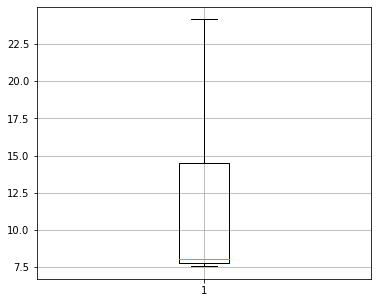

In [150]:
plt.figure(figsize=(6,5))
plt.boxplot(DatIndex["Fare"])
plt.grid();

Handling Outliers for SibSp

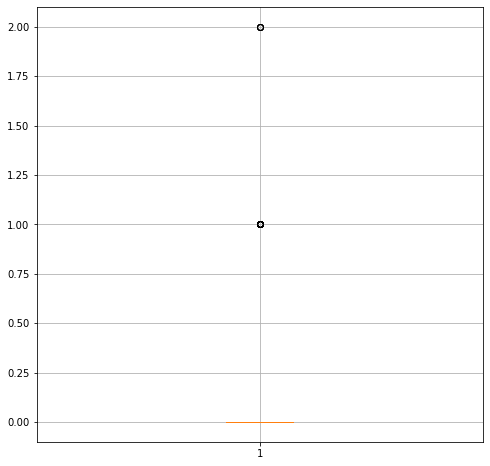

In [151]:
plt.figure(figsize=(8,8))
plt.boxplot(DatIndex["SibSp"])
plt.grid();

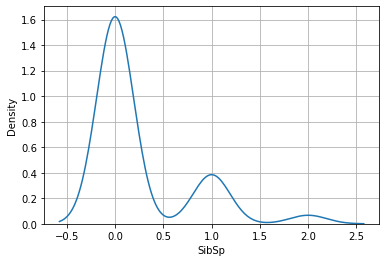

In [152]:
sns.kdeplot(DatIndex["SibSp"])
plt.grid()

In [153]:
DatIndex["SibSp"].skew()

1.911603146530221

In [154]:
Q1 = np.percentile(DatIndex["SibSp"],25)
Q2 = np.percentile(DatIndex["SibSp"],50)
Q3 = np.percentile(DatIndex["SibSp"],75)
IQR = Q3 - Q1
lower_limit = Q1 - .02 * IQR
upper_limit = Q3 + .02 * IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in DatIndex["SibSp"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = DatIndex[(DatIndex["SibSp"] < lower_limit) | (DatIndex["SibSp"] > upper_limit)].index
DatIndex.drop(index_dropped,inplace=True)
DatIndex

The first Quartile = 0.0,
The Second Quartile = 0.0, 
The Third Quartile = 0.0, 
IQR = 0.0, 

lower limit = 0.0,
upper limit = 0.0

The outliers are = [1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Unknown,Q
18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,Unknown,S
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,Unknown,Q
30,0,3,"Todoroff, Mr. Lalio",male,28.0,0,0,349216,7.8958,Unknown,S
33,1,3,"Glynn, Miss. Mary Agatha",female,28.0,0,0,335677,7.7500,Unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...
829,1,3,"McCormack, Mr. Thomas Joseph",male,28.0,0,0,367228,7.7500,Unknown,Q
838,0,3,"Sirota, Mr. Maurice",male,28.0,0,0,392092,8.0500,Unknown,S
869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,Unknown,S


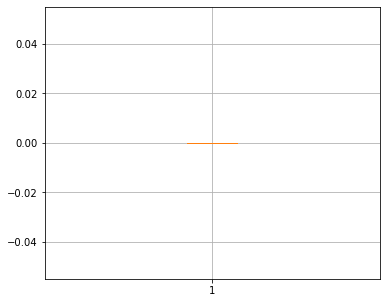

In [155]:
plt.figure(figsize=(6,5))
plt.boxplot(DatIndex["SibSp"])
plt.grid();

We have now cleared the outliers in Age, Fare and SibSp using percentiles.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [156]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(DatIndex[['Survived','Age']])
data_minmax = minmax_scale.transform(DatIndex[['Survived', 'Age']])

In [157]:
print('Min-value after min-max scaling:\nSurvived={:.2f}, Age={:.2f}'
      .format(data_minmax[:,0].min(), data_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nSurvived={:.2f}, Age={:.2f}'
      .format(data_minmax[:,0].max(), data_minmax[:,1].max()))

Min-value after min-max scaling:
Survived=0.00, Age=0.00

Max-value after min-max scaling:
Survived=1.00, Age=0.00


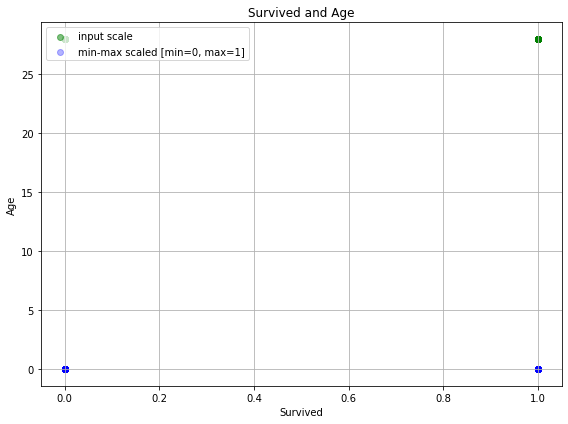

In [158]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(DatIndex['Survived'], DatIndex['Age'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(data_minmax[:,0], data_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Survived and Age')
    plt.xlabel('Survived')
    plt.ylabel('Age')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

                                                    -- The End --